In [48]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# Define the neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.convlayer1 = nn.Sequential(
            nn.Conv2d(1, 32, 3,padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.convlayer2 = nn.Sequential(
            nn.Conv2d(32,64,3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.fc1 = nn.Linear(64 * 6 * 6, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.convlayer1(x)
        x = self.convlayer2(x)
        x = x.view(-1, 64 * 6 * 6)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return nn.functional.log_softmax(x, dim=1)



In [57]:
# Load the dataset
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())


<class 'torch.Tensor'>
torch.Size([128, 1, 28, 28])
torch.Size([128])


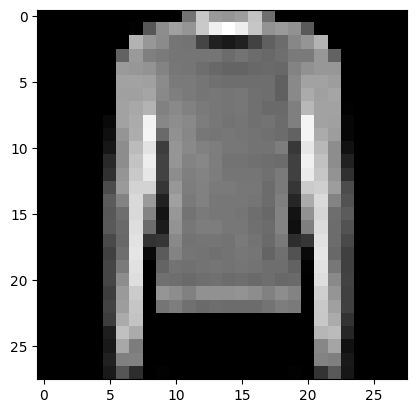

In [84]:

# Define the data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=False)

# Examine a sample
data_iter = iter(train_loader)
images, labels = data_iter.next()
print(type(images))
print(images.shape)
print(labels.shape)

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(images[1].numpy().squeeze(), cmap = 'Greys_r')

In [85]:
# Enable GPU acceleration if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [95]:
# Define the optimizer and loss function
model = Net().to(device)
optimizer = optim.Adam(model.parameters(), 
                       lr=0.001, 
                       betas=(0.9, 0.999),
                       eps=1e-08, 
                       weight_decay=0, 
                       amsgrad=False)
criterion = nn.CrossEntropyLoss()



In [96]:
# Train the model
for epoch in range(10):
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

    # Print the training loss
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch+1, loss.item()))



Epoch: 1 	Training Loss: 0.246310
Epoch: 2 	Training Loss: 0.171334
Epoch: 3 	Training Loss: 0.094238
Epoch: 4 	Training Loss: 0.143822
Epoch: 5 	Training Loss: 0.128545
Epoch: 6 	Training Loss: 0.108459
Epoch: 7 	Training Loss: 0.136686
Epoch: 8 	Training Loss: 0.121784
Epoch: 9 	Training Loss: 0.057786
Epoch: 10 	Training Loss: 0.120206


In [98]:
# Test the model
model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        test_loss += criterion(output, target).item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

test_loss /= len(test_loader.dataset)
print('Test Loss: {:.6f}, Test Accuracy: {:.2f}%'.format(test_loss, 100. * correct / len(test_loader.dataset)))

Test Loss: 0.001884, Test Accuracy: 92.30%
